learn from：[How to get started with Machine Learning in about 10 minutes](https://www.freecodecamp.org/news/how-to-get-started-with-machine-learning-in-less-than-10-minutes-b5ea68462d23/)

## 数据探索

In [1]:
# 导入需要用到的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# 加载数据
train_df=pd.read_csv("~/workspace_python/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#各列的解释
- PassengerId：乘客的标识符
- Survived：他/她是否存活了下来
- Pclass：舱室类别，1 经济舱，2 商务舱，3 头等舱
- Name：乘客的姓名
- Sex：性别
- Age：年龄
- SibSp：兄弟siblings，配偶spouses，表示在船上的兄弟姐妹以及配偶的数目
- Parch：父母parents，子女children，表示在船只上的父母和子女的数目
- Ticket：船票详情
- Fare：票价
- Cabin：舱号，NaN表示未知
- Embarked：登船的起始地，S 南安普顿 Southampton，Q 皇后镇 Queenstown，C 瑟堡 Cherbourg

In [3]:
# 查看整体数据情况
train_df.describe(include="all")
# 根据count行可以看出有部分列有缺失值

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Samaan, Mr. Youssef",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


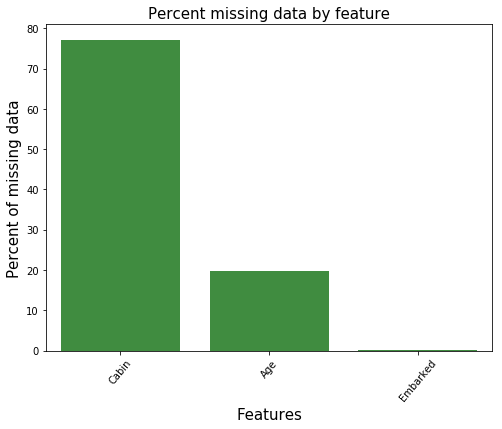

In [4]:
# 重点查看数据缺失严重的数据情况
def missingdata(data):
    total=train_df.isnull().sum().sort_values(ascending=False)
    percent=(train_df.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending=False)
    ms=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    ms=ms[ms["Percent"]>0]
    
    plt.subplots(figsize=(8,6))
    plt.xticks(rotation='50')
    fig=sns.barplot(ms.index,ms["Percent"],color="green",alpha=0.8)
    plt.xlabel("Features",fontsize=15)
    plt.ylabel("Percent of missing data",fontsize=15)
    plt.title("Percent missing data by feature",fontsize=15)
    
    return ms

missingdata(train_df)

## 数据清理

In [5]:
# 从上图可以看出，舱号、年龄以及登船地的数据都有一些缺失值，而舱号信息有大量的缺失，就需要对它们进行处理
# 数据清理中最常见的技术是填充缺失数据：
# 分类数据只能用众数，连续数据可以用中位数或平均数
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0],inplace=True)
train_df["Age"].fillna(train_df["Age"].median(),inplace=True)
train_df.drop(["Cabin"],axis=1,inplace=True)

train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 特征工程

In [6]:
# 特征工程基本上就是根据当前可用数据发现特征或数据的技术
# 以登船地数据为例--这是用Q、S或C填充的数据，Python库不能处理这个，因为它只能处理数字
# 所以需要用所谓的独热向量化（One Hot Vectorization）来处理，它可以把一列变成三列
# 用0或1来填充Embarked_Q、Embarked_S、Embarked_C，来表示这个人是不是从这个港口出发的

# 再以SibSp和Parch为例，这两列没有什么有趣的，但是你可能会想知道某个乘客有多少家人登上了这艘船
# 如果家人多的话可能会增加生存几率，因为他们可以互相帮助，从另一个角度说，单独登船的乘客可能很难生存下去
# 因此可以创建新的一列，这一列是成员数量（family size），family size=SibSp+Parch+1（乘客自己）

# 最后一个例子是以bin列为例的，由于你很难区分具有相似性的事物，所有这种操作创建了值范围（ranges of values），
# 然后将多个值组合在一起，比如5岁和6岁的乘客之间有显著的差异吗？或者45和46岁的人之间有显著的差异吗？
# 这是创建bin列的原因，就年龄而言，可以创建四列，幼儿（0-14岁），青少年（14-20岁），
# 成年人（20-40岁）以及年长的人（40岁以上）

all_data=train_df
all_data["FamilySize"]=all_data["SibSp"]+all_data["Parch"]+1

# 正则匹配出名字中的头衔
import re
def get_title(name):
    title_search=re.search("([A-Za-z]+)\.",name)
    if title_search:
        return title_search.group(1)
    return ""

all_data["Title"]=all_data["Name"].apply(get_title)

# 查看列的唯一值
all_data["Title"].unique()
# array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
#        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
#        'Jonkheer'], dtype=object)

# 用“Rare”统一替换一些非常见的头衔
all_data["Title"]=all_data["Title"].replace(["Lady","Countess","Capt","Col","Don","Dr","Major",
                                             "Rev","Sir","Jonkheer","Dona"],"Rare")

all_data['Title'] = all_data['Title'].replace('Mlle', 'Miss').replace('Ms', 'Miss').replace('Mme', 'Mrs')

# all_data["Title"].unique()
# array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

# 对年龄进行分箱
all_data["Age_bin"]=pd.cut(all_data["Age"],bins=[0,14,20,40,120],
                           labels=["Children","Teenager","Adult","Elder"])


# 查看票价的范围
# all_data["Fare"].describe()
# count    891.000000
# mean      32.204208
# std       49.693429
# min        0.000000
# 25%        7.910400
# 50%       14.454200
# 75%       31.000000
# max      512.329200

# 对票价进行分箱
all_data["Fare_bin"]=pd.cut(all_data["Fare"],bins=[0,7.91,14.45,31,120],
                            labels=["Low_fare","Median_fare","Average_fare","High_fare"])


# 删除多余列
all_data.drop(["Age","Fare","Name","Ticket","PassengerId"],axis=1,inplace=True)

# all_data

# 添加哑变量
all_data=pd.get_dummies(all_data,columns=["Sex","Title","Age_bin","Embarked","Fare_bin"],
                       prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

all_data

,Survived,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenager,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_Median_fare,Fare_type_Average_fare,Fare_type_High_fare
0,0,3,1,0,2,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,1,1,1,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1,3,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
3,1,1,1,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
5,0,3,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
6,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
7,0,3,3,1,5,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
8,1,3,0,2,3,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
9,1,2,1,0,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


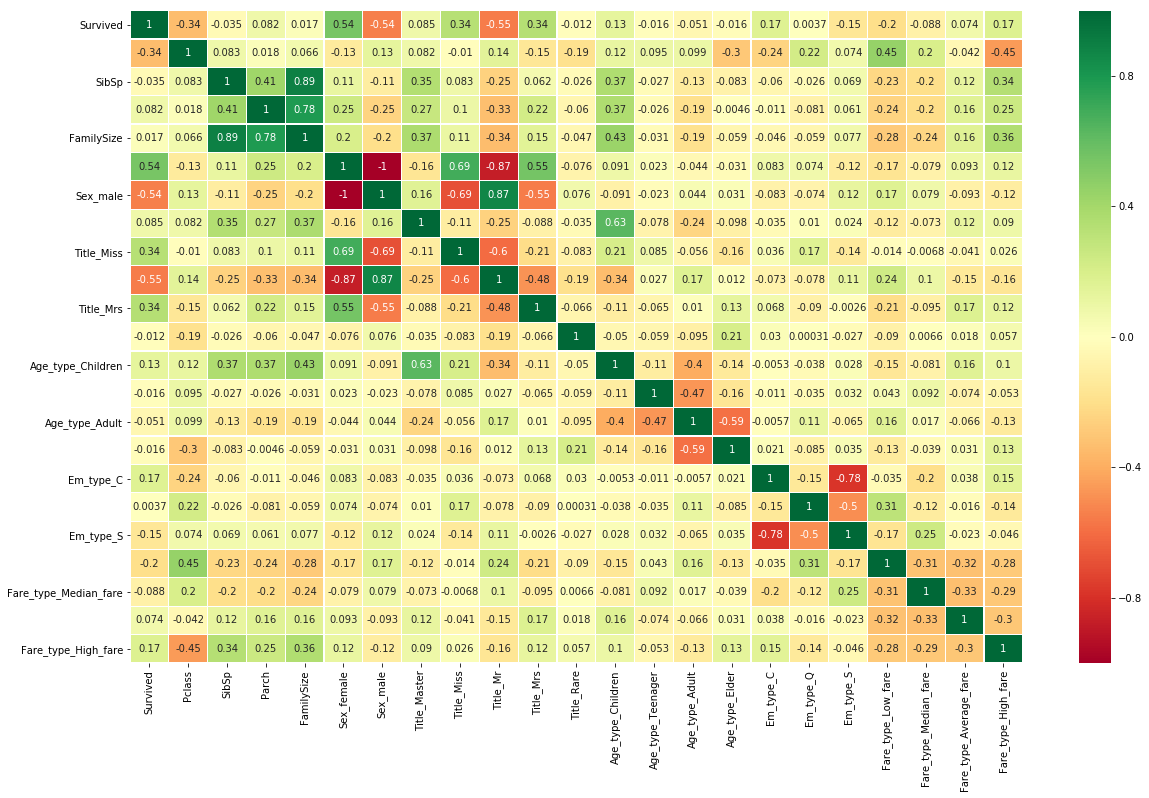

In [7]:
# 已经创建完所有的特征，接着看看这些特征之间的相关性
# 相关系数矩阵
# linewidths,热力图矩阵之间的间隔大小
# cmap，热力图颜色
# annot，annotate的缩写，annot默认为False，当annot为True时，在heatmap中每个方格写入数据
sns.heatmap(all_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# 相关值接近1意味着高度正相关，-1意味着高度负相关
# 例如，性别为男和女之间就呈负相关，因为必须将乘客识别为一种性别
# 此外，除了用特征工程创建的内容外，没有哪两种是高度相关的，证明特征工程有效
# 如果某些因素之间高度相关会怎样，可以删除其中的一个，
# 新列中的信息并不能给系统提供任何新信息，因为这两者是完全一样的

## 机器学习建模

In [8]:
# 导入需要用到的包
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# 去掉y值
Targeted_feature=all_data["Survived"]
all_features=all_data.drop(["Survived"],axis=1)

# 划分训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(all_features,Targeted_feature,
                                               test_size=0.3,random_state=42)

print(X_train.shape,X_test.shape,
      y_train.shape,y_test.shape)

(623, 22) (268, 22) (623,) (268,)


## Scikit-Learn库中有多种算法供选择：
- 逻辑回归
- 随机森林
- 支持向量机
- K最近邻
- 朴素贝叶斯
- 决策树
- AdaBoost
- LDA
- 梯度增强

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 82.09
The cross validated score for Random Forest Classifier is: 83.51


Text(0.5, 1.05, 'Confusion_matrix')

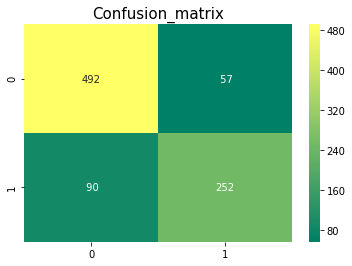

In [9]:
# 以随机森林为例
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类模型
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

# criterion：string,optional,default='gini'，衡量分裂质量的函数，基尼系数/信息增益/熵
# n_estimators：integer,optional,default=10，森林里决策树的数目
# min_samples_split：int,float,optional,default=2，分割内部结点所需要的最小样本数量
# min_samples_leaf：int,float,optional,default=1，需要在叶子节点上的最小样本数量
# max_features：int,float,string or None,optional,default="auto"，寻找最佳分割时需要考虑的特征数目
# oob_score：bool,default=False，是否使用袋外样本来估计泛化精度
# random_state：int,RandomState instance or None，随机数生成器使用的种子
# n_jobs：integer,optional，用于拟合和预测的并行运行的工作数量，-1为核的数量

# 用模型拟合训练数据
model.fit(X_train,y_train)

# 用模型预测测试集
prediction_rm=model.predict(X_test)

print('--------------The Accuracy of the model----------------------------')

# 打印accuracy_score，保留两位小数
# 比较prediction_rm模型预测的y值和测试集的y值
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(prediction_rm,y_test)*100,2))

# k=10, 把数据随机分成10等份
kfold = KFold(n_splits=10, random_state=22) 

# 交叉验证
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')

# estimator：数据对象
# X：数据
# y：预测数据
# soring：调用的方法
# cv：交叉验证生成器或可迭代的次数

# 打印交叉验证有效性的accuracy_score
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))

# 预测y标签
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)

# 画混淆矩阵的热力图
# fmt：格式
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)
